In [ ]:
!pip install transformers --upgrade

In [ ]:
!pip install sacrebleu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 3.3 MB/s eta 0:00:00


In [ ]:
!pip install transformers[sentencepiece]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.4 MB/s eta 0:00:00


In [ ]:
!pip install datasets
!pip install rouge_score
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=ea3b719d65282f88f7170baf617cbb0b48bf382c4a6ed27eba9c0f6782b74714
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 7.5 MB/s eta 0:00:00
     ━━━━

In [ ]:
!pip install tensorflow --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 77.7 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.14.0
    Uninstalling tensorflow-2.14.0:
      Successfully

In [ ]:
from transformers import pipeline, set_seed

import matplotlib.pyplot as plt

import pandas as pd
from datasets import load_dataset, load_metric
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

import pandas as pd
import numpy as np

import nltk
from nltk.tokenize import sent_tokenize

In [ ]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from datasets import load_dataset

dataset = load_dataset("cnn_dailymail", version="3.0.0")

print(f"Features in cnn_dailymail : {dataset['train'].column_names}")

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Features in cnn_dailymail : ['article', 'highlights', 'id']


In [ ]:
dataset


DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})

In [ ]:
dataset['train'][1]

{'article': 'Editor\'s note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O\'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial. MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor." Here, inmates with the most severe mental illnesses are incarcerated until they\'re ready to appear in court. Most often, they face drug charges or charges of assaulting an officer --charges that Judge Steven Leifman says are usually "avoidable felonies." He says the arrests often result from confrontations with police. Mentally ill people often won\'t do what they\'re told when police arrive on the scene -- confrontation seems to exacerbate their illness and they become more paranoid, delusional, and less li

In [ ]:
sample = dataset['train'][1]
print(f"""
Article (excerpt of 500 characters, total length: {len(sample["article"])}):
""")
print(sample["article"][:500])
print(f'\nSummary (length: {len(sample["highlights"])}):')
print(sample["highlights"])


Article (excerpt of 500 characters, total length: 4051):

Editor's note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial. MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor." Here, inmates with the most s

Summary (length: 281):
Mentally ill inmates in Miami are housed on the "forgotten floor"
Judge Steven Leifman says most are there as a result of "avoidable felonies"
While CNN tours facility, patient shouts: "I am the son of the president"
Leifman says the system is unjust and he's fighting for change .


In [ ]:
sample_text = dataset['train'][1]["article"][:1000]

# We will collect the generated summaries of each model in a dictionay
summaries = {}

In [ ]:
#hide_out
import nltk
from nltk.tokenize import sent_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
string = "The U.S. are a country. The U.N. is an organization."

sent_tokenize(string)


['The U.S. are a country.', 'The U.N. is an organization.']

In [ ]:
def baseline_summary_three_sent(text):
    return "\n".join(sent_tokenize(text)[:3])

In [ ]:
summaries['baseline'] = baseline_summary_three_sent(sample_text)
summaries['baseline']

'Editor\'s note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events.\nHere, Soledad O\'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial.\nMIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor."'

## **GPT2**

In [ ]:
from transformers import pipeline, set_seed

set_seed(42)
pipe = pipeline('text-generation', model = 'gpt2-medium')

gpt2_query = sample_text + "\nTL;DR:\n"

pipe_out = pipe(gpt2_query, max_length = 512, clean_up_tokenization_spaces = True)

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [ ]:
pipe_out

[{'generated_text': 'Editor\'s note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O\'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial. MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor." Here, inmates with the most severe mental illnesses are incarcerated until they\'re ready to appear in court. Most often, they face drug charges or charges of assaulting an officer --charges that Judge Steven Leifman says are usually "avoidable felonies." He says the arrests often result from confrontations with police. Mentally ill people often won\'t do what they\'re told when police arrive on the scene -- confrontation seems to exacerbate their illness and they become more paranoid, delusional, and

In [ ]:
pipe_out[0]['generated_text'][len(gpt2_query) : ]

'The Eighth Amendment of the U.S. Constitution protects citizens from unreasonable search & seizure. This is what Leifman said in a 2012 hearing before Florida\'s Florida Supreme Court when questioned by judge Patricia Smith to address the problem of mentally ill people being arrested by police. That hearing occurred three months after a local judge in Miami ordered the state of Florida to stop using police officers as stand-by for all mentally ill people, something the U.S. Supreme Court ruled as unconstitutional a month before. "I think I\'ve made it clear that the Fourth Amendment prohibits police officers from using non-law enforcement officers," Leifman said. "And I believe in common law -- and I\'m proud of this fact -- in common law, it is unlawful for police officers to serve as stand-bys for a mentally ill person." He noted that the Fourth Amendment was intended to stop a person suffering involuntary manslaughter when his or her own death threatened to occur as a result of the

In [ ]:
summaries['gpt2'] = "\n".join(sent_tokenize(pipe_out[0]['generated_text'][len(gpt2_query) : ]))

In [ ]:
#t5

 ## **T5**

In [ ]:
pipe = pipeline('summarization', model = 't5-small')
pipe_out = pipe(sample_text)

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

In [ ]:
pipe_out

[{'summary_text': "inmates with the most severe mental illnesses are incarcerated until they're ready to appear in court . most often, they face drug charges or charges of assaulting an officer . mentally ill people become more paranoid, delusional, and less likely to follow dir ."}]

In [ ]:
summaries['t5'] = '\n'.join(sent_tokenize(pipe_out[0]['summary_text']))

In [ ]:
## *BART*

In [ ]:
pipe = pipeline("summarization", model = "facebook/bart-large-cnn")
pipe_out = pipe(sample_text)

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
pipe_out

[{'summary_text': 'Miami-Dade pretrial detention facility is dubbed the "forgotten floor" Here, inmates with the most severe mental illnesses are incarcerated. Most often, they face drug charges or charges of assaulting an officer. Judge Steven Leifman says the arrests often result from confrontations with police.'}]

In [ ]:
summaries['bart'] = "\n".join(sent_tokenize(pipe_out[0]["summary_text"]))

In [ ]:
## PEGASUS

In [ ]:
pipe = pipeline("summarization", model="google/pegasus-cnn_dailymail")
pipe_out = pipe(sample_text)

config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

In [ ]:
pipe_out

[{'summary_text': 'Mentally ill inmates are housed on the "forgotten floor" of a Miami jail .<n>Judge Steven Leifman says the charges are usually "avoidable felonies"<n>He says the arrests often result from confrontations with police .<n>Mentally ill people often won\'t do what they\'re told when police arrive on the scene .'}]

In [ ]:
summaries["pegasus"] = pipe_out[0]["summary_text"].replace(" .<n>", ".\n")

In [ ]:
## comparing different summaries

In [ ]:
print("Ground Truth")

print(dataset['train'][1]['highlights'])

for model_name in summaries:
    print(model_name.upper())
    print(summaries[model_name])

Ground Truth
Mentally ill inmates in Miami are housed on the "forgotten floor"
Judge Steven Leifman says most are there as a result of "avoidable felonies"
While CNN tours facility, patient shouts: "I am the son of the president"
Leifman says the system is unjust and he's fighting for change .
BASELINE
Editor's note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events.
Here, Soledad O'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial.
MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor."
GPT2
The Eighth Amendment of the U.S. Constitution protects citizens from unreasonable search & seizure.
This is what Leifman said in a 2012 hearing before Florida's Florida Supreme Court when questioned by judge Patricia Smi

In [ ]:
## SacreBLEU

In [ ]:
from datasets import load_metric

bleu_metric = load_metric("sacrebleu")

<ipython-input-36-eacc06f6d0e4>:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  bleu_metric = load_metric("sacrebleu")


In [ ]:

import pandas as pd
import numpy as np

bleu_metric.add(
    prediction="the the the the the the", reference=["the cat is on the mat"])
results = bleu_metric.compute(smooth_method="floor", smooth_value=0)
results["precisions"] = [np.round(p, 2) for p in results["precisions"]]
pd.DataFrame.from_dict(results, orient="index", columns=["Value"])

,Value
score,0.0
counts,"[2, 0, 0, 0]"
totals,"[6, 5, 4, 3]"
precisions,"[33.33, 0.0, 0.0, 0.0]"
bp,1.0
sys_len,6
ref_len,6


In [ ]:

bleu_metric.add(
    prediction="the cat is on mat", reference=["the cat is on the mat"])
results = bleu_metric.compute(smooth_method="floor", smooth_value=0)
results["precisions"] = [np.round(p, 2) for p in results["precisions"]]
pd.DataFrame.from_dict(results, orient="index", columns=["Value"])

,Value
score,57.893007
counts,"[5, 3, 2, 1]"
totals,"[5, 4, 3, 2]"
precisions,"[100.0, 75.0, 66.67, 50.0]"
bp,0.818731
sys_len,5
ref_len,6


In [ ]:
## Rouge

In [ ]:
rouge_metric = load_metric('rouge')

In [ ]:

reference = dataset["train"][1]["highlights"]
records = []
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]

for model_name in summaries:
    rouge_metric.add(prediction=summaries[model_name], reference=reference)
    score = rouge_metric.compute()
    rouge_dict = dict((rn, score[rn].mid.fmeasure) for rn in rouge_names)
    records.append(rouge_dict)
pd.DataFrame.from_records(records, index=summaries.keys())

,rouge1,rouge2,rougeL,rougeLsum
baseline,0.365079,0.145161,0.206349,0.285714
gpt2,0.166667,0.043796,0.115942,0.152174
t5,0.197802,0.022472,0.131868,0.197802
bart,0.365591,0.131868,0.215054,0.322581
pegasus,0.500000,0.244898,0.360000,0.460000


In [ ]:
## Evaluating on the Test set of the CNN Daily Mail Dataset

In [ ]:
def calculate_metric_on_baseline_test_ds(dataset, metric, column_text = 'article', column_summary = 'highlights' ):
    summaries = [baseline_summary_three_sent(text) for text in dataset[column_text] ]

    metric.add_batch(predictions = summaries, references = dataset[column_summary] )

    score = metric.compute()
    return score

In [ ]:
test_sampled = dataset['train'].shuffle(seed = 42).select(range(1000))

score = calculate_metric_on_baseline_test_ds(test_sampled, rouge_metric )

rouge_dict = dict((rn, score[rn].mid.fmeasure ) for rn in rouge_names )

pd.DataFrame.from_dict(rouge_dict, orient = 'index' , columns = ['baseline'] ).T

,rouge1,rouge2,rougeL,rougeLsum
baseline,0.253995,0.100642,0.165754,0.231571


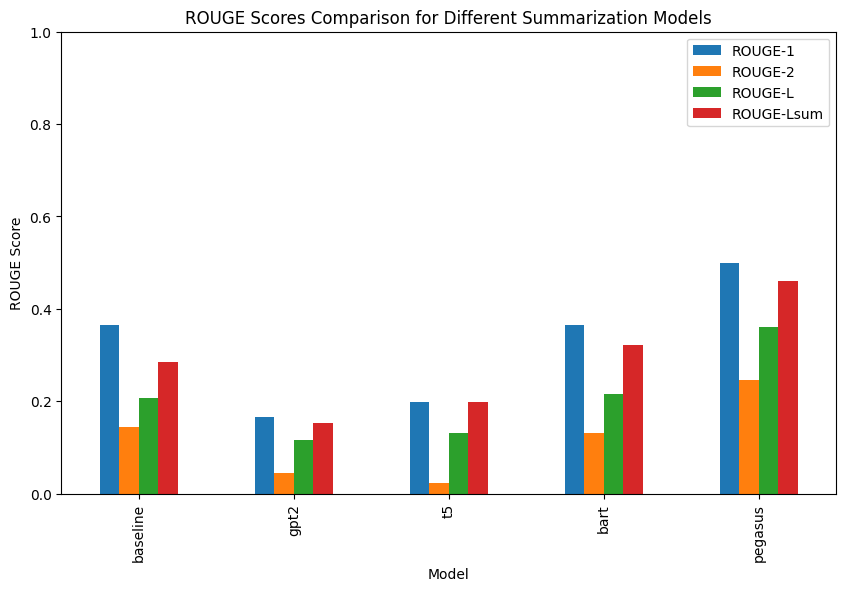

In [ ]:
import matplotlib.pyplot as plt

# Data
model_names = list(summaries.keys())
rouge1_scores = []
rouge2_scores = []
rougeL_scores = []
rougeLsum_scores = []

# Calculate ROUGE scores for each model
for model_name in model_names:
    rouge_metric.add(prediction=summaries[model_name], reference=reference)
    score = rouge_metric.compute()
    rouge1_scores.append(score["rouge1"].mid.fmeasure)
    rouge2_scores.append(score["rouge2"].mid.fmeasure)
    rougeL_scores.append(score["rougeL"].mid.fmeasure)
    rougeLsum_scores.append(score["rougeLsum"].mid.fmeasure)

# Create a DataFrame for easier plotting
df = pd.DataFrame({
    'Model': model_names,
    'ROUGE-1': rouge1_scores,
    'ROUGE-2': rouge2_scores,
    'ROUGE-L': rougeL_scores,
    'ROUGE-Lsum': rougeLsum_scores,
})

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

df.set_index('Model').plot(kind='bar', ax=ax)
plt.title('ROUGE Scores Comparison for Different Summarization Models')
plt.ylabel('ROUGE Score')
plt.xlabel('Model')
plt.ylim([0, 1])  # Set the y-axis limit to better visualize differences

# Display the plot
plt.show()


In [ ]:
## Strategy to calculate the Rouge Metric on test dataset for the other models

In [ ]:
from tqdm import tqdm
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

def generate_batch_sized_chunks(list_of_elements, batch_size):
    """split the dataset into smaller batches that we can process simultaneously
    Yield successive batch-sized chunks from list_of_elements."""
    for i in range(0, len(list_of_elements), batch_size):
        yield list_of_elements[i : i + batch_size]

def calculate_metric_on_test_ds(dataset, metric, model, tokenizer,
                               batch_size=16, device=device,
                               column_text="article",
                               column_summary="highlights"):
    article_batches = list(generate_batch_sized_chunks(dataset[column_text], batch_size))
    target_batches = list(generate_batch_sized_chunks(dataset[column_summary], batch_size))

    for article_batch, target_batch in tqdm(
        zip(article_batches, target_batches), total=len(article_batches)):

        inputs = tokenizer(article_batch, max_length=1024,  truncation=True,
                        padding="max_length", return_tensors="pt")

        summaries = model.generate(input_ids=inputs["input_ids"].to(device),
                         attention_mask=inputs["attention_mask"].to(device),
                         length_penalty=0.8, num_beams=8, max_length=128)
        ''' parameter for length penalty ensures that the model does not generate sequences that are too long. '''

        # Finally, we decode the generated texts,
        # replace the <n> token, and add the decoded texts with the references to the metric.
        decoded_summaries = [tokenizer.decode(s, skip_special_tokens=True,
                                               clean_up_tokenization_spaces=True)
               for s in summaries]

        decoded_summaries = [d.replace("<n>", " ") for d in decoded_summaries]


        metric.add_batch(predictions=decoded_summaries, references=target_batch)

    #  Finally compute and return the ROUGE scores.
    score = metric.compute()
    return score

In [ ]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

model_ckpt = "google/pegasus-cnn_dailymail"

tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

model_pegasus = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt).to(device)

score = calculate_metric_on_test_ds(test_sampled, rouge_metric,
                                   model_pegasus, tokenizer, batch_size=8)

rouge_dict = dict((rn, score[rn].mid.fmeasure) for rn in rouge_names)

# At the end, we compute and return the ROUGE scores.
pd.DataFrame(rouge_dict, index=["pegasus"])

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.encoder.embed_positions.weight', 'model.decoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


NameError: ignored

In [ ]:
#hide_input
pd.DataFrame(rouge_dict, index=["pegasus"])

 **Train a summary model**

In [ ]:
#hide_output
dataset_samsum=load_dataset("samsum")
split_lengths = [len(dataset_samsum[split])for split in dataset_samsum]
print(f"Split lengths: {split_lengths}")
print("Features: {dataset_samsum['train'].column_names}")
print("\nDialogue;")
print(dataset_samsum["test"][0]["dialogue"])
print("\nSummary:")
print(dataset_samsum["test"][0]["summary"])

In [ ]:
#hide_input
print(f"Split lengths: {split_lengths}")
print (f"Features: {dataset_samsum['train'].column_names}")
print("\nDialogue:")
print(dataset_samsum["test"][0]["dialogue"])
print("\nSummary:")
print(dataset_samsum["test"][0]["summary"])

 **Evaluate PEGASUS on SAMsum**

In [ ]:
pipe_out = pipe(dataset_samsum["test"][0]["dialogue"])
print("Summary:")
print(pipe_out[0]["summary_text"].replace(" .<n>", ".\n"))

In [ ]:
def calculate_metric_on_test_ds(dataset, metric, model, tokenizer, batch_size=8, column_text="article", column_summary="highlights"):
    summaries = [baseline_summary_three_sent(text) for text in dataset[column_text]]

    metric.add_batch(predictions=summaries, references=dataset[column_summary])

    score = metric.compute()
    return score


In [ ]:
score = calculate_metric_on_test_ds(dataset_samsum["test"], rouge_metric, model_pegasus, tokenizer, batch_size=8, column_text="dialogue", column_summary="summary")
rouge_dict = dict((rn, score [rn].mid.fmeasure) for rn in rouge_names)
pd.DataFrame(rouge_dict, index=["pegasus"])

In [ ]:
pd.DataFrame(rouge_dict,index=["pegasus"])



```
# This is formatted as code
```

**Fine-tuning PEGASUS**

In [ ]:
d_len=[len(tokenizer.encode(s)) for s in dataset_samsum["train"]["dialogue"]]
s_len =[len(tokenizer.encode(s)) for s in dataset_samsum["train"]["summary"]]

fig, axes = plt.subplots(1, 2, figsize=(10, 3.5), sharey=True)
axes[0].hist(d_len, bins=20, color="C0", edgecolor="C0")  # Use "C0" for blue
axes[0].set_title("Dialogue Token Length")
axes[0].set_xlabel("Length")
axes[0].set_ylabel("Count")
axes[1].hist(s_len, bins=20, color="C1", edgecolor="C1")  # Use "C1" for a different color
axes[1].set_title("Summary Token Length")
axes[1].set_xlabel("Length")
plt.tight_layout()
plt.show()


In [ ]:
def convert_examples_to_features(example_batch):
    input_encodings = tokenizer(example_batch["dialogue"], max_length=1024, truncation=True)

    with tokenizer.as_target_tokenizer():
        target_encodings = tokenizer(example_batch["summary"], max_length=128, truncation=True)

    return {
        "input_ids": input_encodings["input_ids"],
        "attention_mask": input_encodings["attention_mask"],
        "labels": target_encodings["input_ids"]
    }

dataset_samsum_pt = dataset_samsum.map(convert_examples_to_features, batched=True)

columns = ["input_ids", "labels", "attention_mask"]

dataset_samsum_pt.set_format(type="torch", columns=columns)


In [ ]:
#id teacher-forcing
#alt Decoder input and Label alignemt for text generation.
#caption Decoder input and Label alignemt for text generation.
text = ['PAD', 'Transformers', 'are', "awesome", 'for', 'text', 'summarization']
rows =[]
for i in range(len(text)-1):
  rows.append({'step': i+1, 'decoder_input': text[:i+1], 'label': text[i+1]})
pd.DataFrame(rows).set_index('step')

In [ ]:
from transformers import DataCollatorForSeq2Seq

seq2seq_data_collator = DataCollatorForSeq2Seq(tokenizer, model=model_pegasus)

In [ ]:
pip install accelerate --upgrade

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir='pegasus-samsum', num_train_epochs=10, warmup_steps=500, per_device_train_batch_size=1, per_device_eval_batch_size=1, weight_decay=0.01, logging_steps=10, push_to_hub=True, evaluation_strategy='steps', eval_steps=500, save_steps=1e6, gradient_accumulation_steps=16)

In [ ]:
#hide_output
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
from transformers import AutoModelForSeq2SeqLM

# Load the pretrained Pegasus model
model = AutoModelForSeq2SeqLM.from_pretrained("google/pegasus-cnn_dailymail")


In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("google/pegasus-cnn_dailymail")


In [ ]:
from datasets import load_dataset

dataset = load_dataset("cnn_dailymail", version="3.0.0")

# Print the column names in the dataset
print(f"Features in cnn_dailymail : {dataset['train'].column_names}")


In [ ]:
tokenized_datasets = dataset.map(
    lambda examples: tokenizer(examples['article'], examples['highlights'], truncation=True),
    batched=True,
)


In [ ]:
from transformers import PegasusForConditionalGeneration, PegasusTokenizer, Seq2SeqTrainer, Seq2SeqTrainingArguments
from datasets import load_dataset

# Load PEGASUS model and tokenizer
model_name = "google/pegasus-cnn_dailymail"
model = PegasusForConditionalGeneration.from_pretrained(model_name)
tokenizer = PegasusTokenizer.from_pretrained(model_name)

# Load the CNN/DailyMail dataset
dataset = load_dataset("cnn_dailymail", version="3.0.0")

# Print the first few examples in the dataset along with column names
sample_batch = dataset["train"][:5]
for example in sample_batch:
    # Check if the example is a dictionary
    if isinstance(example, dict):
        print("Column names:", example.keys())
        print("Example:", example)
        print()
    else:
        print("Example is not a dictionary:", example)
        print()

# Assuming the correct column names are 'article' and 'highlights'
# Update the column names based on the actual structure of your dataset
column_names = {'input_text': 'article', 'target_text': 'highlights'}

# Tokenize the dataset
tokenized_datasets = dataset.map(
    lambda examples: tokenizer(examples[column_names['input_text']], examples[column_names['target_text']], truncation=True),
    batched=True,
)

# Set up training arguments
training_args = Seq2SeqTrainingArguments(
    output_dir="./pegasus_downstream_model",
    evaluation_strategy="steps",  # Evaluate every `eval_steps` during training
    eval_steps=500,  # Adjust as needed
    save_steps=500,  # Adjust as needed
    logging_steps=10,
    save_total_limit=2,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    num_train_epochs=3,  # Adjust as needed
    overwrite_output_dir=True,
    learning_rate=5e-5,  # Adjust as needed
)

# Set up Seq2SeqTrainer
trainer = Seq2SeqTrainer(
    model=model,
    tokenizer=tokenizer,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
)

# Fine-tune the model
trainer.train()

# Save the fine-tuned model
model.save_pretrained("./pegasus_downstream_model")
tokenizer.save_pretrained("./pegasus_downstream_model")


In [ ]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, Trainer

In [ ]:
trainer = Trainer(model=model, args=training_args, tokenizer=tokenizer, data_collator=seq2seq_data_collator, train_dataset=dataset_samsum_pt["train"], eval_dataset=dataset_samsum_pt["validation"])


In [ ]:
trainer = Trainer(
    model=model_pegasus,
    args=training_args,
    tokenizer=tokenizer,
    data_collator=seq2seq_data_collator,
    train_dataset=dataset_samsum_pt["train"],
    eval_dataset=dataset_samsum_pt["validation"]
)


In [ ]:
# Train the model
trainer.train()

# Calculate ROUGE metrics
score = calculate_metric_on_baseline_test_ds(
    dataset_samsum["test"],
    rouge_metric,
    trainer.model,
    tokenizer,
    batch_size=2,
    column_text="dialogue",
    column_summary="summary"
)

rouge_dict = dict((rn, score[rn].mid.fmeasure) for rn in rouge_names)
rouge_dataframe = pd.DataFrame(rouge_dict, index=[f"pegasus"])


In [ ]:
# hide_input
pd.DataFrame (rouge_dict, index=[f"pegasus"])

In [ ]:
# hide_output
trainer.push_to_hub ("Training complete!")

In [ ]:
# hide
import transformers
transformers.logging.set_verbosity_error()

In [ ]:
gen_kwargs = {"length_penalty": 0.8, "num_beams": 8, "max_length": 128}

sample_text = dataset_samsum["test"][0]["dialogue"]

reference = dataset_samsum ["test"][0]["summary"]

pipe = pipeline("summarization", model="transformersbook/pegasus-samsum")

print("Dialogue:")

print(sample_text)

print("\nReference Summary:")

print (reference)

print("\nModel Summary: ")

print (pipe (sample_text, **gen_kwargs)[0]["summary_text"])

In [ ]:
custom_dialogue = """\

Thom: Hi guys, have you heard of transformers?

Lewis: Yes, I used them recently!

Leandro: Indeed, there is a great library by Hugging Face.

Thom: I know, I helped build it ;)

Lewis: Cool, maybe we should write a book about it. What do you think? Leandro: Great idea, how hard can it be?!

Thom: I am in!

Lewis: Awesome, let's do it together!
"""

print(pipe(custom_dialogue, **g gen_kwargs)[0]["summary_text"])